<center><h1>QBUS3600 - Business Analytics in Practice - 2025S1</h1></center>
<center><h2> Individual Assignment 1 </h2></center>

### SID: 520316612

<br/>

## External data (ABS SEIFA)
- Data link:https://www.abs.gov.au/statistics/people/people-and-communities/socio-economic-indexes-areas-seifa-australia/latest-release#data-downloads
- Data name: Postal Area, Indexes, SEIFA 2021.xlsx

In [1]:
# Import some external libraries
import pandas as pd                  
import numpy as np                  
import seaborn as sns                
import matplotlib.pyplot as plt 
import scipy.stats as stat 
from scipy.stats import chi2_contingency

# I. Importing Data & Data Inspection

## 1. Dataset: Supporters

In [2]:
# Import 'Supporters' dataset 
supporter = pd.read_csv('Supporters.csv')

In [3]:
supporter['SupporterID'].duplicated().sum()

0

In [4]:
supporter['Mailing_Country'].unique()

array(['Australia', nan, 'AUSTRALIA', 'australia'], dtype=object)

In [5]:
# supporter.info()
sup_summary = pd.DataFrame({
    'Column': supporter.columns,
    'Missing Count': supporter.isnull().sum().values,
    'Dtype': supporter.dtypes.values
})
display(sup_summary)

,Column,Missing Count,Dtype
0,Age_Bucket,596776,object
1,DoNotContact,0,bool
2,Donation.GiftDate_Last,154759,object
3,Have_HomePhone,0,object
4,DoNotPhone,0,bool
5,Have_MobilePhone,0,object
6,Have_Email,0,object
7,DoNotMail,0,bool
8,Mailing_City,405504,object
9,DoNotEmail,0,bool


## 2. Dataset: Campaigns

In [6]:
# Import 'Campaign' dataset 
camp = pd.read_csv('Campaigns.csv')

In [7]:
camp_summary = pd.DataFrame({
    'Column': camp.columns,
    'Missing Count': camp.isnull().sum().values,
    'Dtype': camp.dtypes.values
})
display(camp_summary)

,Column,Missing Count,Dtype
0,ParentID,9101,object
1,Start_Date,36,object
2,Content_Thematic_Area,19020,object
3,Content_Focus,296,object
4,Type,0,object
5,Sub_Type,1,object
6,Activity,20,object
7,CampaignID,0,object
8,Solicitation_Channel,9555,object
9,Appeal_Season,0,object


## 3. Dataset: Campaign members

In [8]:
# Import 'Campaign members' dataset 
campaign_mem=pd.DataFrame() # Define an empty dataframe
with pd.read_csv("student_CampaignMembers.csv", chunksize=1000000) as reader:
    for chunk in reader:
        campaign_mem = pd.concat([campaign_mem, chunk], ignore_index=True) # adds one chunk at a time
        print(campaign_mem.shape)

(1000000, 4)
(2000000, 4)
(3000000, 4)
(4000000, 4)
(5000000, 4)
(6000000, 4)
(7000000, 4)
(8000000, 4)
(9000000, 4)
(10000000, 4)
(11000000, 4)
(12000000, 4)
(13000000, 4)
(14000000, 4)
(15000000, 4)
(16000000, 4)
(17000000, 4)
(18000000, 4)
(19000000, 4)
(20000000, 4)
(21000000, 4)
(22000000, 4)
(23000000, 4)
(24000000, 4)
(25000000, 4)
(26000000, 4)
(27000000, 4)
(28000000, 4)
(29000000, 4)
(30000000, 4)
(31000000, 4)
(32000000, 4)
(33000000, 4)
(34000000, 4)
(35000000, 4)
(36000000, 4)
(37000000, 4)
(38000000, 4)
(39000000, 4)
(40000000, 4)
(41000000, 4)
(42000000, 4)
(43000000, 4)
(44000000, 4)
(45000000, 4)
(46000000, 4)
(47000000, 4)
(48000000, 4)
(49000000, 4)
(49507402, 4)


## 4. Dataset: Donations

In [9]:
# Import 'Donations' dataset
donation = pd.read_csv('student_Donations.csv')

In [10]:
# donation.info()
donation_summary = pd.DataFrame({
    'Column': donation.columns,
    'Missing Count': donation.isnull().sum().values,
    'Dtype': donation.dtypes.values
})
display(donation_summary)

,Column,Missing Count,Dtype
0,Payment_Type,2,object
1,Donation_Channel,613235,object
2,SupporterID,0,object
3,Gift_Date,0,object
4,DonationID,0,object
5,CampaignID,0,object
6,RGID,1174210,object
7,Gift_Amount,0,float64


## 5. Dataset: Regular Giving

In [11]:
# Import "Regular Giving" dataset
regular = pd.read_csv('student_RegularGiving.csv')

In [12]:
regular['Installment_Frequency'].unique()

array(['Monthly', '4 Weekly', 'Quarterly', 'Yearly', 'Semi-Annual',
       'Bi-monthly'], dtype=object)

In [13]:
regular_summary = pd.DataFrame({
    'Column': regular.columns,
    'Missing Count': regular.isnull().sum().values,
    'Dtype': regular.dtypes.values
})
display(regular_summary)

,Column,Missing Count,Dtype
0,Campaign_Activity,97,object
1,Cancel_Reason,25190,object
2,Product_Initial,4,object
3,Product_Current,0,object
4,Cancellation_Date,24093,object
5,Payment_Type,7,object
6,Installment_Frequency,0,object
7,SupporterID,0,object
8,Solicitation_Channel,209,object
9,Status,0,object


In [14]:
# Summary of 5 dataset
dataframes = {
    "Supporter": supporter,
    "Campaigns": camp,
#     "Campaign members": campaign_mem,
    "Donations": donation,
    "Regular Giving": regular
}

summary = pd.DataFrame(
    [(name, df.shape[0], df.shape[1]) for name, df in dataframes.items()],
    columns=["Dataset", "Rows", "Columns"]
)

# Display the table
summary

,Dataset,Rows,Columns
0,Supporter,661292,18
1,Campaigns,21943,10
2,Donations,6114649,8
3,Regular Giving,158301,14


## II. Data Cleaning and Data Transformation

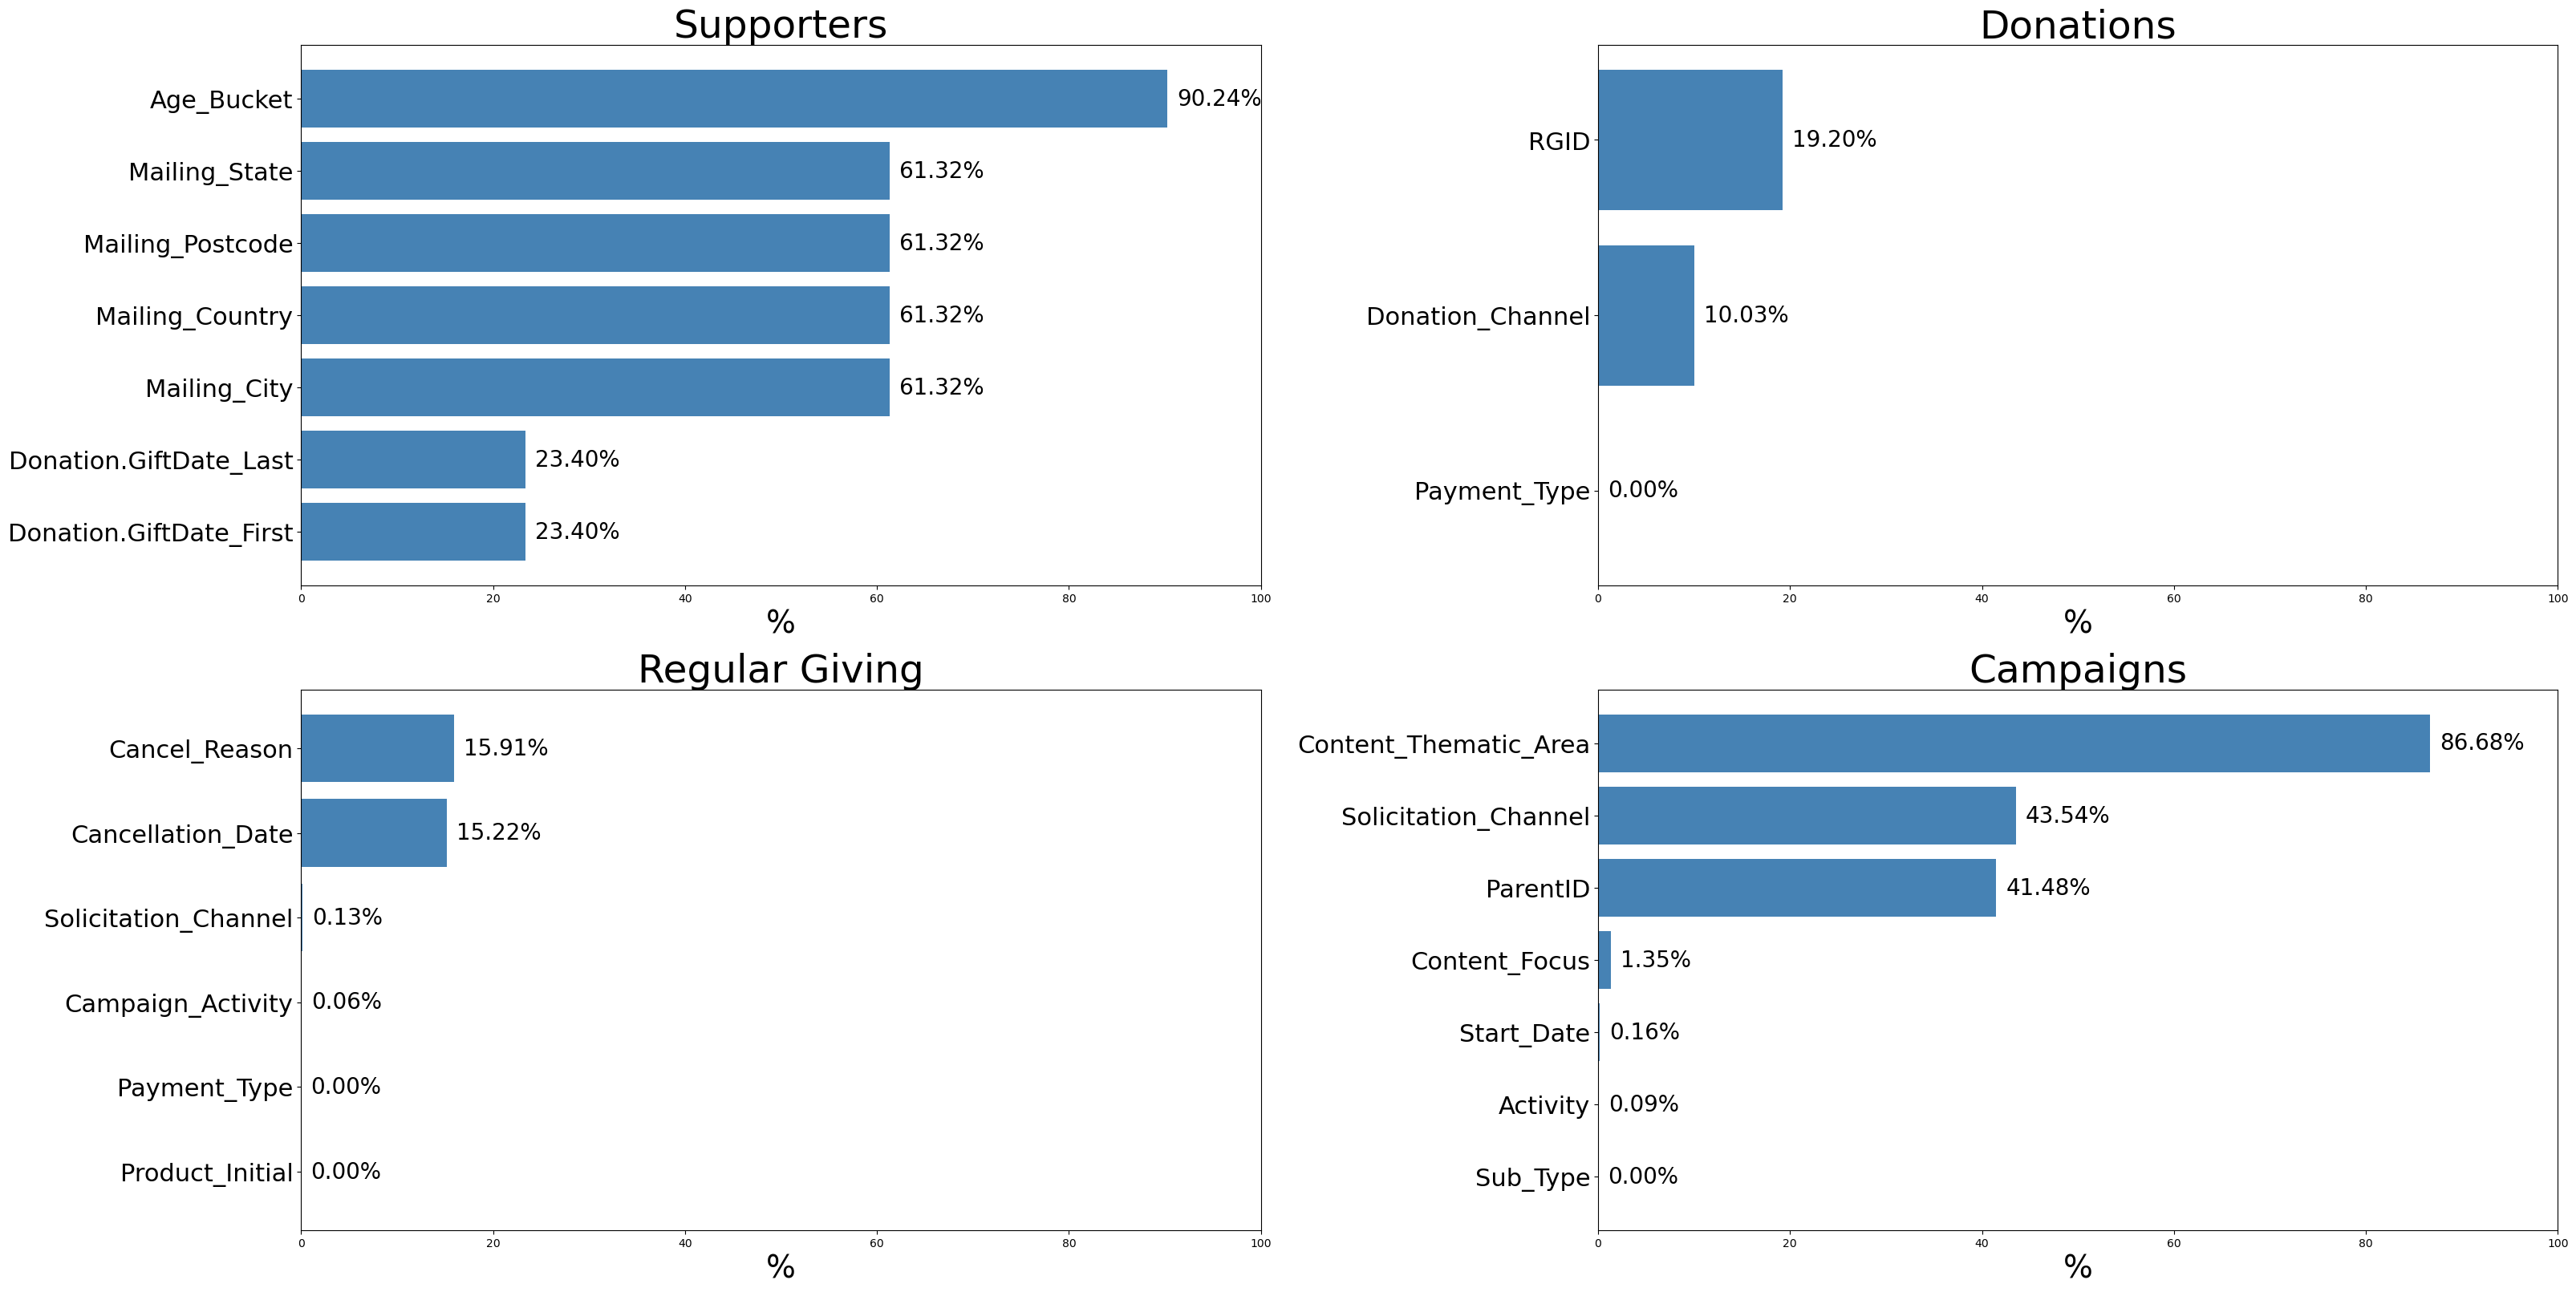

In [15]:
# Percentage of missing data per column
def missing_percent(df):
    return (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

datasets = {
    'Supporters': supporter,
    'Donations': donation,
    'Regular Giving': regular,
    'Campaigns': camp
}

# Plot the proportion of missing data in each dataset
fig, axs = plt.subplots(2, 2, figsize=(32, 16), constrained_layout=True)
axs = axs.flatten()

for ax, (name, df) in zip(axs, datasets.items()):

    missing = missing_percent(df)
    missing = missing[missing > 0]  # only plot columns with missing data
    bars = ax.barh(missing.index, missing.values, color='steelblue')
    ax.set_title(f'{name}', fontsize=35)
    ax.set_xlim(0, 100)
    ax.set_xlabel('%', fontsize=28)
    ax.tick_params(axis='y', labelsize=22)
    ax.invert_yaxis()
    
# Add data labels 
    for bar, value in zip(bars, missing.values):
        ax.text(value + 1, bar.get_y() + bar.get_height()/2,
                f'{value:.2f}%', va='center', fontsize=20, color='black')

# plt.savefig('figure 1')     
plt.show()

In [16]:
# Removex 'Content Thematic Area', 'ParentID' column from campaign
camp.drop(columns=['Content_Thematic_Area','ParentID'], inplace=True)

In [17]:
# Remove 'Age Bucket', 'Mailing_Country', 'Mailing_City'
sup = supporter.copy()
sup.drop(columns=['Age_Bucket', 'Mailing_Country', 'Mailing_City'], inplace=True)
sup.dropna(inplace=True)
sup.reset_index(drop=True, inplace=True)

# III. Data Merging

## 1. New variables

Create new variables by joining data 

In [18]:
# Create a new variable: Whether this supporter is Regular giver
regular_ids = set(regular['SupporterID'].dropna())

# Add new binary column to supporter: 'Yes' if ID is in regular, else 'No'
sup['Regular_Giver'] = sup['SupporterID'].apply(lambda x: True if x in regular_ids else False)

In [19]:
# Create new variable: 'Average gifted amount'
# Compute average donated amount per supporter
avg_gift = donation.groupby('SupporterID')['Gift_Amount'].mean().round(2).reset_index()
avg_gift.rename(columns={'Gift_Amount': 'Avg_Gift_Amount'}, inplace=True)

# Merge into supporter table
sup = sup.merge(avg_gift, on='SupporterID', how='left')

In [20]:
# Create new variable: 'Total gifted amount'
# Compute total donated amount per supporter
tot_gift = donation.groupby('SupporterID')['Gift_Amount'].sum().reset_index()
tot_gift.rename(columns={'Gift_Amount': 'Total_Gift_Amount'}, inplace=True)

# Merge into supporter table
sup = sup.merge(tot_gift, on='SupporterID', how='left')

In [21]:
# Create new variable: 'Donation count'
# Count number of donations per supporter
donation_count = donation.groupby('SupporterID').size().reset_index(name='Donation_Count')

# Merge new variable into the final data set
sup = sup.merge(donation_count, on='SupporterID', how='left')

# # 3. Fill in 0 for sups who may have no donation records (just in case)
# sup['Donation_Count'] = sup['Donation_Count'].fillna(0).astype(int)

In [22]:
# Create new variable: 'Converted to regular'
# Filter one-off giver whose RGID in Donations is null)
one_off = donation[donation['RGID'].isna()]

# Get first one-off gift date
first_one_off = one_off.groupby('SupporterID')['Gift_Date'].min().reset_index()
first_one_off.rename(columns={'Gift_Date': 'First_OneOff_Date'}, inplace=True)

# Regular date established per supporter
first_rg = regular.groupby('SupporterID')['Date_Established'].min().reset_index()
first_rg.rename(columns={'Date_Established': 'First_RG_Date'}, inplace=True)

conversion_check = pd.merge(first_one_off, first_rg, on='SupporterID', how='inner')

# Determine if conversion happened: regular date established started AFTER one-off donation
conversion_check['Converted_To_Regular'] = conversion_check['First_RG_Date'] > conversion_check['First_OneOff_Date']

# Merge it to the main dataset
sup= sup.merge(
    conversion_check[['SupporterID', 'Converted_To_Regular']],
    on='SupporterID',
    how='left'
)

In [23]:
# Fill missing values (supporters with no regular giving record) as 'No'
sup['Converted_To_Regular'] = sup['Converted_To_Regular'].fillna(False)

In [24]:
# Create new variable: 'Product_Initial' and 'Product_Current'
# Merge into main dataset
sup = sup.merge(
    regular[["SupporterID", "Product_Initial", "Product_Current"]],
    on="SupporterID",
    how="left"
)

sup["Product_Initial"] = sup["Product_Initial"].fillna("Not Regular")
sup["Product_Current"] = sup["Product_Current"].fillna("Not Regular")


In [25]:
sup

,DoNotContact,Donation.GiftDate_Last,Have_HomePhone,DoNotPhone,Have_MobilePhone,Have_Email,DoNotMail,DoNotEmail,Mailing_State,DoNotSMS,...,Donation.GiftDate_First,Mailing_Postcode,Have_WorkPhone,Regular_Giver,Avg_Gift_Amount,Total_Gift_Amount,Donation_Count,Converted_To_Regular,Product_Initial,Product_Current
0,True,2007-03-02,Yes,True,No,No,True,True,NSW,True,...,1991-01-22,2022.0,Yes,False,5.65,73.50,13.0,False,Not Regular,Not Regular
1,False,2018-07-11,No,False,No,No,True,False,NSW,False,...,1991-05-28,2152.0,Yes,True,13.12,1154.30,88.0,True,Global Parent,Global Parent
2,True,1995-09-04,No,True,No,No,True,True,VIC,True,...,1992-12-03,3179.0,No,False,8.40,42.00,5.0,False,Not Regular,Not Regular
3,False,2023-12-12,No,False,No,No,False,False,NSW,False,...,1989-11-01,2042.0,No,False,438.40,17097.50,39.0,False,Not Regular,Not Regular
4,False,2024-12-03,Yes,False,No,No,False,False,NSW,False,...,1989-11-01,2024.0,Yes,False,96.80,3097.57,32.0,False,Not Regular,Not Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225327,False,2024-03-15,No,False,Yes,No,False,False,VIC,False,...,2020-07-14,3058.0,Yes,True,35.44,567.00,16.0,False,Global Parent,Global Parent
225328,False,2024-03-15,No,False,Yes,No,False,False,VIC,False,...,2020-07-14,3058.0,Yes,True,35.44,567.00,16.0,False,Global Parent,Global Parent
225329,False,2020-10-21,No,False,Yes,Yes,False,True,WA,False,...,2020-07-15,6224.0,Yes,True,14.00,56.00,4.0,False,Global Parent,Global Parent
225330,False,2020-07-16,No,False,Yes,Yes,False,False,WA,False,...,2020-07-16,6064.0,Yes,False,6.30,6.30,1.0,False,Not Regular,Not Regular


## 3. External data

### 3.1 MOSAIC data

Import and create new variables from MOSAIC data

In [26]:
# Load file
art = pd.read_csv("Postcode ART.csv")  # contains ['Postcode', 'Mosaic_Code']

In [27]:
# For each postcode, find the Mosaic type with the highest count and use it as the dominant group
art.set_index('Postcode', inplace=True)
art['Dominant_Mosaic'] = art.idxmax(axis=1)
art = art.reset_index()

### 3.2 SEIFA data

Import and create new variables from SEIFA data

In [28]:
# Import SEIFA file and load 'Table 1' 
seifa = pd.read_excel('Postal Area, Indexes, SEIFA 2021.xlsx', sheet_name='Table 1', skiprows=5)
seifa = seifa.iloc[:-2, :-2]

In [29]:
# Ensure postcode columns are integer for merging
sup['Mailing_Postcode'] = sup['Mailing_Postcode'].astype('Int64')
art['Postcode'] = art['Postcode'].astype('Int64')
seifa['2021 Postal Area (POA) Code'] = seifa['2021 Postal Area (POA) Code'].astype('Int64')

# Merge with supporter table
sup = sup.merge(art[['Postcode', 'Dominant_Mosaic']], 
                left_on='Mailing_Postcode', right_on='Postcode', how='left')
sup.drop(columns='Postcode', inplace=True)  # drop the extra postcode column

In [30]:
# Create new variables by merging SEIFA scores
seifa_subset = seifa[['2021 Postal Area (POA) Code', 
                      'Decile.1', 
                      'Decile.3']]
seifa_subset.columns = ['Mailing_Postcode', 'SEIFA_AdvDis_Decile', 'SEIFA_EduOcc_Decile']

sup = sup.merge(seifa_subset, on='Mailing_Postcode', how='left')


## 2. Data Transformation

In [31]:
# Convert binary variables
sup = sup.replace({'Yes': 1, 'No': 0})
binary_cols = sup.select_dtypes(include=['bool']).columns
sup[binary_cols] = sup[binary_cols].astype(int)

Create plot showing missing values of the final table

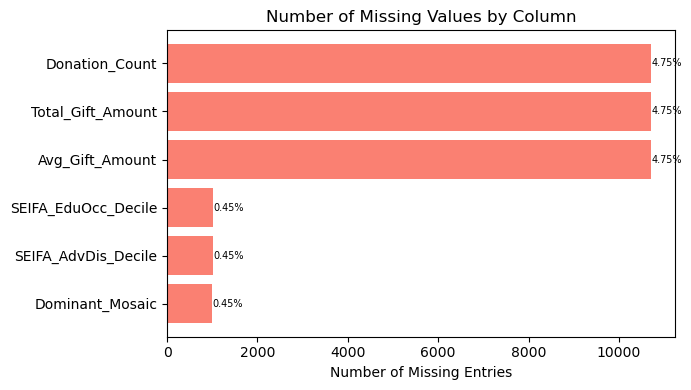

In [32]:
# Proportion of Missing data in final table

# Calculate missing counts and percentages
total_rows = len(sup)
missing_counts = sup.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values()
missing_pct = (missing_counts / total_rows * 100).round(2)

# Plot horizontal bars
plt.figure(figsize=(7, 4))
bars = plt.barh(missing_counts.index, missing_counts.values, color="salmon")
plt.title("Number of Missing Values by Column")
plt.xlabel("Number of Missing Entries")

# Add % labels 
for bar, pct in zip(bars, missing_pct):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
             f"{pct:.2f}%", va='center', fontsize=7)

plt.tight_layout()
# plt.savefig('figure 2')
plt.show()

In [33]:
# Log transformation on average and total gift amount
sup["Log_Avg_Gift"] = np.log(sup["Avg_Gift_Amount"].replace(0, 0.01))
sup["Log_Total_Gift"] = np.log(sup["Total_Gift_Amount"].replace(0, 0.01))

In [34]:
# Rename columns
sup.rename(columns={
#     "Avg_Gift_Amount": "Average_Gift_Amount_Log",
#     "Total_Gift_Amount": "Total_Gift_Amount_Log",
#     "Regular_Giver": "Is_Regular_Giver",
#     "Converted_To_Regular": "Is_Converted",
#     "Have_Email": "Has_Email",
#     "DoNotEmail": "Opted_Out_Email",
    "Dominant_Mosaic": "Mosaic_Group",
    "SEIFA_AdvDis_Decile": "SEIFA_AdvDis",
    "SEIFA_EduOcc_Decile": "SEIFA_EduOcc",
    'Donation.GiftDate_First': 'First_Giftdate',
    'Donation.GiftDate_Last': 'Last_Giftdate',
}, inplace=True)

In [35]:
# Change columns order
main_columns = [
    'SupporterID',
    'Regular_Giver',
    'Converted_To_Regular',
    'Avg_Gift_Amount',
    'Total_Gift_Amount',
    'Donation_Count',
    'First_Giftdate',
    'Last_Giftdate',
#     'Donor_Type',
    'Mailing_Postcode',
    'Mailing_State',
    'Mosaic_Group',  
    'SEIFA_AdvDis',
    'SEIFA_EduOcc',
    'Product_Initial',
    'Product_Current'
]

other_columns = [col for col in sup.columns if col not in main_columns]

# Reorder DataFrame
sup= sup[main_columns + other_columns]

In [36]:
# Data types adjustments
sup["SEIFA_AdvDis"] = pd.to_numeric(sup["SEIFA_AdvDis"], errors="coerce")

sup["First_Giftdate"] = pd.to_datetime(sup["First_Giftdate"])
sup["Last_Giftdate"] = pd.to_datetime(sup["Last_Giftdate"])

In [37]:
# Final table data cleaning
# Remove missing values in new variables
sup.dropna(subset=['Avg_Gift_Amount', 'SEIFA_AdvDis','SEIFA_EduOcc'], inplace = True)
# Remove suppporters whose total gifted amount < 1
sup = sup[sup["Total_Gift_Amount"] >= 1]

In [38]:
sup_summary = pd.DataFrame({
    'Column': sup.columns,
    'Missing Count': sup.isnull().sum().values,
    'Dtype': sup.dtypes.values
})
display(sup_summary)

,Column,Missing Count,Dtype
0,SupporterID,0,object
1,Regular_Giver,0,int32
2,Converted_To_Regular,0,int32
3,Avg_Gift_Amount,0,float64
4,Total_Gift_Amount,0,float64
5,Donation_Count,0,float64
6,First_Giftdate,0,datetime64[ns]
7,Last_Giftdate,0,datetime64[ns]
8,Mailing_Postcode,0,Int64
9,Mailing_State,0,object


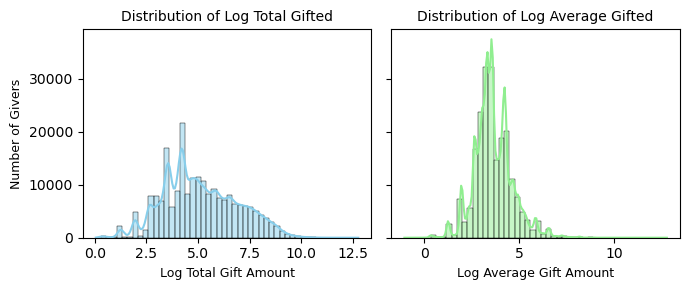

In [39]:
# Log transformation for total and average 
fig, axes = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

# log total distribution
sns.histplot(
    sup["Log_Total_Gift"],
    bins=50,
    kde=True,
    color="skyblue",
    edgecolor="black",
    ax=axes[0]
)
axes[0].set_title("Distribution of Log Total Gifted", fontsize=10)
axes[0].set_xlabel("Log Total Gift Amount", fontsize=9)
axes[0].set_ylabel("Number of Givers", fontsize=9)

# log average distribution
sns.histplot(
    sup["Log_Avg_Gift"],
    bins=50,
    kde=True,
    color="lightgreen",
    edgecolor="black",
    ax=axes[1]
)
axes[1].set_title("Distribution of Log Average Gifted", fontsize=10)
axes[1].set_xlabel("Log Average Gift Amount", fontsize=9)
axes[1].set_ylabel("")  

# Layout setup
# plt.savefig('figure 3')
plt.tight_layout()
plt.show()

In [40]:
# Skewness and kurtosis of Total and Average
stat4 = sup[['Avg_Gift_Amount','Total_Gift_Amount']].describe()
stat4 = stat4.drop(index=['25%','50%','75%','count','mean','std','min','max'])
stat4.loc['Skew', :] = sup[['Avg_Gift_Amount','Total_Gift_Amount']].skew() 
stat4.loc['Kurt', :] = sup[['Avg_Gift_Amount','Total_Gift_Amount']].kurt()
stat4

,Avg_Gift_Amount,Total_Gift_Amount
Skew,323.505272,38.640992
Kurt,120001.982488,3779.043318


# IV. Descriptive Statistics

## Overall donor analysis

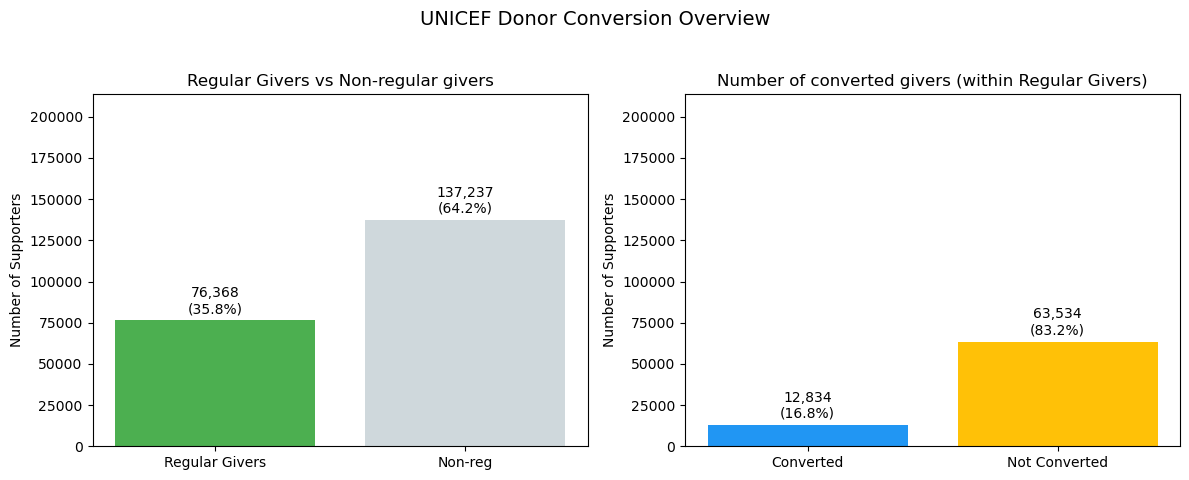

In [41]:
# Count values
total = len(sup)
reg = sup["Regular_Giver"].sum()
converted = sup["Converted_To_Regular"].sum()

# Conversion rate
conversion_rate = converted / reg * 100

# Prepare figure
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Regular vs Non-regular
bars1 = ax[0].bar(["Regular Givers", "Non-reg"],
                  [reg, total - reg],
                  color=["#4CAF50", "#CFD8DC"],
                  )

# Add data labels
ax[0].bar_label(bars1,
    labels=[f"{v:,}\n({v/total*100:.1f}%)" for v in [reg, total - reg]],
    padding=3)

ax[0].set_title("Regular Givers vs Non-regular givers")
ax[0].set_ylabel("Number of Supporters")
ax[0].set_ylim(0, max(total, reg))  # unifies y-axis scale

# Converted vs Not Converted
bars2 = ax[1].bar(["Converted", "Not Converted"],
                  [converted, reg - converted],
                  color=["#2196F3", "#FFC107"],
                  )

# Add data labels
ax[1].bar_label(bars2,
    labels=[f"{v:,}\n({v/reg*100:.1f}%)" for v in [converted, reg - converted]],
    padding=3)

ax[1].set_title("Number of converted givers (within Regular Givers)")
ax[1].set_ylabel("Number of Supporters")
ax[1].set_ylim(0, max(total, reg))  # unify y-axis scale

# Layout adjustments
plt.suptitle("UNICEF Donor Conversion Overview", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('figure 4')
plt.show()

## Donation amount distributions

In [42]:
# Descriptive stats all Givers
stat1 = sup[['Avg_Gift_Amount','Total_Gift_Amount']].describe()
stat1 = stat1.drop(index=['25%','50%','75%'])
stat1.loc['Skew', :] = sup[['Avg_Gift_Amount','Total_Gift_Amount']].skew() 
stat1.loc['Kurt', :] = sup[['Avg_Gift_Amount','Total_Gift_Amount']].kurt() 
stat1.round(2)

,Avg_Gift_Amount,Total_Gift_Amount
count,213605.00,213605.00
mean,76.87,817.59
std,887.92,2691.01
min,0.35,1.05
max,350000.00,350000.00
Skew,323.51,38.64
Kurt,120001.98,3779.04


In [43]:
# Descriptive stats Regular Giver
stat2 = sup[sup['Regular_Giver'] == 1][['Avg_Gift_Amount','Total_Gift_Amount']].describe()
stat2 = stat2.drop(index=['25%','50%','75%'])
stat2.loc['Skew', :] = sup[['Avg_Gift_Amount','Total_Gift_Amount']].skew() 
stat2.loc['Kurt', :] = sup[['Avg_Gift_Amount','Total_Gift_Amount']].kurt() 
stat2.round(2)

,Avg_Gift_Amount,Total_Gift_Amount
count,76368.00,76368.00
mean,28.73,1706.96
std,32.16,3315.27
min,0.35,1.40
max,1808.33,256097.29
Skew,323.51,38.64
Kurt,120001.98,3779.04


In [44]:
# Descriptive stats Non-Regular Giver
stat3 = sup[sup['Regular_Giver'] == 0][['Avg_Gift_Amount','Total_Gift_Amount']].describe()
stat3 = stat3.drop(index=['25%','50%','75%'])
stat3.loc['Skew', :] = sup[['Avg_Gift_Amount','Total_Gift_Amount']].skew() 
stat3.loc['Kurt', :] = sup[['Avg_Gift_Amount','Total_Gift_Amount']].kurt() 
stat3.round(2)

,Avg_Gift_Amount,Total_Gift_Amount
count,137237.00,137237.00
mean,103.65,322.69
std,1106.60,2114.25
min,0.62,1.05
max,350000.00,350000.00
Skew,323.51,38.64
Kurt,120001.98,3779.04


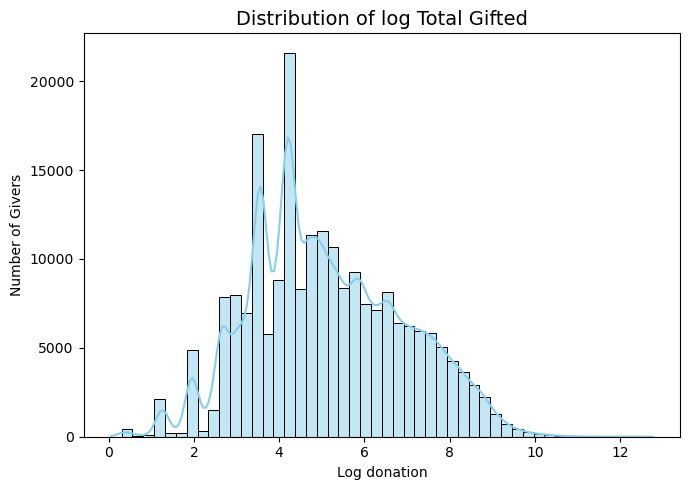

In [45]:
# Distribution of log total 
# Plot
plt.figure(figsize=(7, 5))
sns.histplot(sup["Log_Total_Gift"] , bins=50, kde=True, color="skyblue", edgecolor="black")
plt.title("Distribution of log Total Gifted", fontsize=14)
plt.xlabel("Log donation", fontsize=10)
plt.ylabel("Number of Givers", fontsize=10)

# Layout setup
plt.tight_layout()
# plt.savefig('figure 5')
plt.show()

## Donation count

In [46]:
# Descriptive stats donation count
stat = sup[['Donation_Count']].describe()
stat.loc['Skew', :] = sup[['Donation_Count']].skew() 
stat.loc['Kurt', :] = sup[['Donation_Count']].kurt() 
stat.round(2)

,Donation_Count
count,213605.00
mean,22.07
std,46.78
min,1.00
25%,1.00
50%,2.00
75%,16.00
max,878.00
Skew,3.31
Kurt,13.11


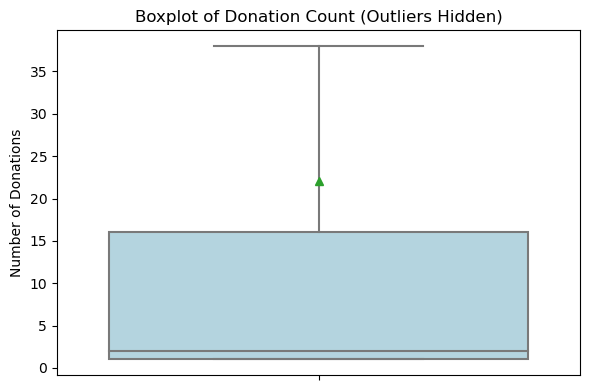

In [47]:
# Boxplot of Donation count
plt.figure(figsize=(6, 4))
sns.boxplot(y=sup["Donation_Count"], color="lightblue", showfliers=False, showmeans=True)
plt.title("Boxplot of Donation Count (Outliers Hidden)")
plt.ylabel("Number of Donations")
# Layout setup
plt.tight_layout()
# plt.savefig('figure 6')
plt.show()

## RFM Analysis 

In [48]:
# Specify the cut-off date for recency
snapshot_date = sup["Last_Giftdate"].max() + pd.Timedelta(days=1)

# Create new RFM columns
sup["Recency"] = (snapshot_date - sup["Last_Giftdate"]).dt.days
sup["Frequency"] = sup["Donation_Count"]
sup["Monetary"] = sup["Total_Gift_Amount"]

# Score each RFM metric (1–5)
sup["R_score"] = pd.qcut(sup["Recency"], 5, labels=[5, 4, 3, 2, 1])  # lower recency gets higher score
sup["F_score"] = pd.qcut(sup["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
sup["M_score"] = pd.qcut(sup["Monetary"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

# Change scores to numeric
sup["R_score"] = sup["R_score"].astype(int)
sup["F_score"] = sup["F_score"].astype(int)
sup["M_score"] = sup["M_score"].astype(int)

# Sum them to get RFM score
sup["RFM_Score"] = sup["R_score"] + sup["F_score"] + sup["M_score"]

# V. Potential relationships

## Correlation matrix

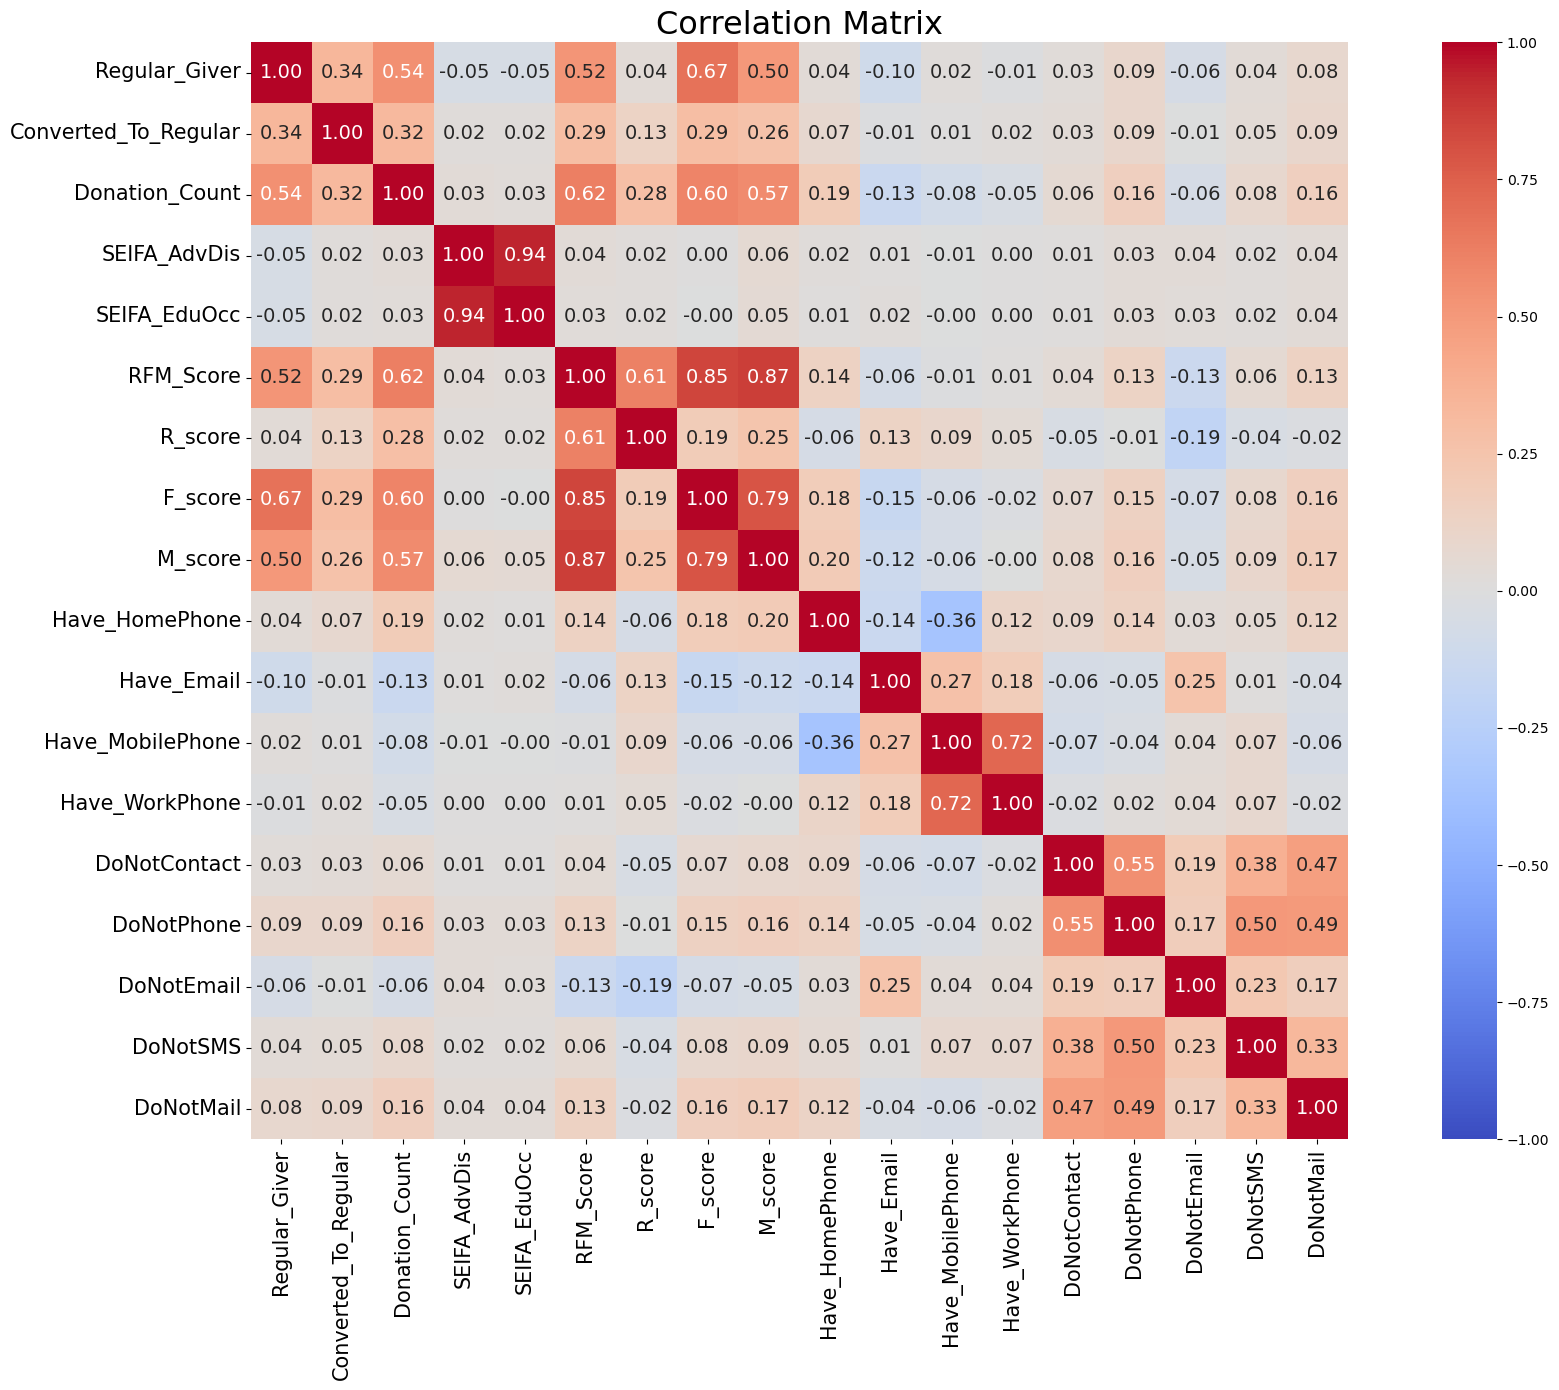

In [49]:
# Relevant numeric columns for correlation
correlation_cols = [
    'Regular_Giver',
#     "Avg_Gift_Amount", 
#     "Total_Gift_Amount",
    "Converted_To_Regular",
    "Donation_Count",
    "SEIFA_AdvDis", 
    "SEIFA_EduOcc", 
    'RFM_Score',
    'R_score', 
    'F_score', 
    'M_score',
    'Have_HomePhone',
    "Have_Email", 
    "Have_MobilePhone",
    'Have_WorkPhone',
    
    'DoNotContact',
    'DoNotPhone',
    'DoNotEmail',
    'DoNotSMS',
    'DoNotMail'
]

corr_data = sup[correlation_cols].apply(pd.to_numeric, errors='coerce')
correlation_matrix = corr_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 14))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, vmin=-1, vmax=1,
            annot_kws={"size": 14}  # Increase label font size
           )
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

plt.title("Correlation Matrix", fontsize=23)
plt.tight_layout()
# plt.savefig('figure 7')
plt.show()

## Donation amount and giver type

In [50]:
c = sup.copy()
# Define donor type
c["Giver_Type"] = "Non-Regular"
c.loc[c["Regular_Giver"] == 1, "Giver_Type"] = "Regular"
c.loc[c["Converted_To_Regular"] == 1, "Giver_Type"] = "Converted"

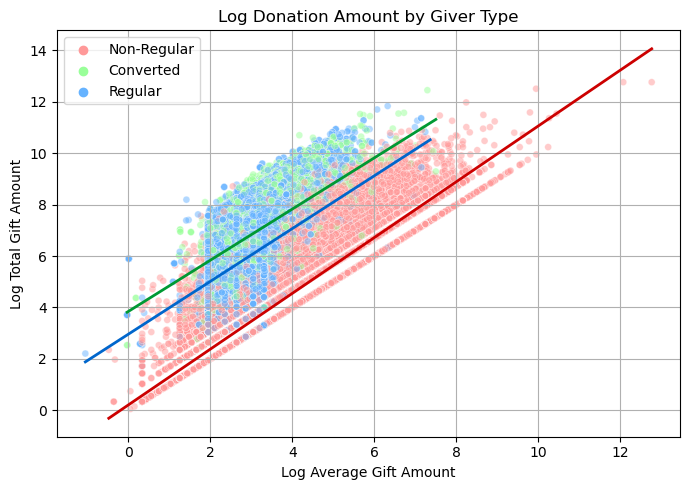

In [51]:
# Color palette
bright_palette = {
    "Non-Regular": "#FF9999",   
    "Regular": "#66B3FF",       
    "Converted": "#99FF99"      
}
dark_palette = {
    "Non-Regular": "#CC0000",   
    "Regular": "#0066CC",       
    "Converted": "#009933"     
}

# Plot Log total vs Log average by donor types
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=c,
    x="Log_Avg_Gift",
    y="Log_Total_Gift",
    hue="Giver_Type",
    alpha=0.5,
    s=25,
    palette=bright_palette
)

# Add trendlines for each donor type
for giver_type in c["Giver_Type"].unique():
    sub = c[c["Giver_Type"] == giver_type]
    z = np.polyfit(sub["Log_Avg_Gift"], sub["Log_Total_Gift"], 1)
    p = np.poly1d(z)
    x_vals = np.linspace(sub["Log_Avg_Gift"].min(), sub["Log_Avg_Gift"].max(), 100)
    plt.plot(x_vals, p(x_vals), color=dark_palette[giver_type], linewidth=2)

# Layout setup
plt.title("Log Donation Amount by Giver Type")
plt.xlabel("Log Average Gift Amount")
plt.ylabel("Log Total Gift Amount")
plt.grid(True)
plt.legend()
plt.tight_layout()
# plt.savefig('figure 8')
plt.show()

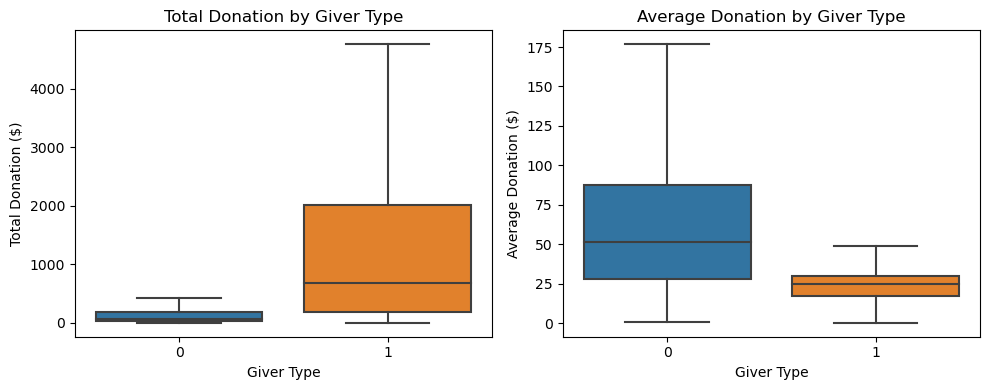

In [52]:
# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Boxplot for total donation amount by giver type
sns.boxplot(data=sup,
    x='Regular_Giver', 
    y='Total_Gift_Amount',  
    ax=axes[0], 
    showfliers=False
)
axes[0].set_title('Total Donation by Giver Type')
axes[0].set_xlabel('Giver Type')
axes[0].set_ylabel('Total Donation ($)')

# Boxplot for average donation amount by giver type
sns.boxplot( data=sup,
    x='Regular_Giver', 
    y='Avg_Gift_Amount', 
    ax=axes[1], 
    showfliers=False
)

# Layout setup
axes[1].set_title('Average Donation by Giver Type')
axes[1].set_xlabel('Giver Type')
axes[1].set_ylabel('Average Donation ($)')

plt.tight_layout()
# plt.savefig('figure 9')
plt.show()

## Giver type & conversion rate and RMF score

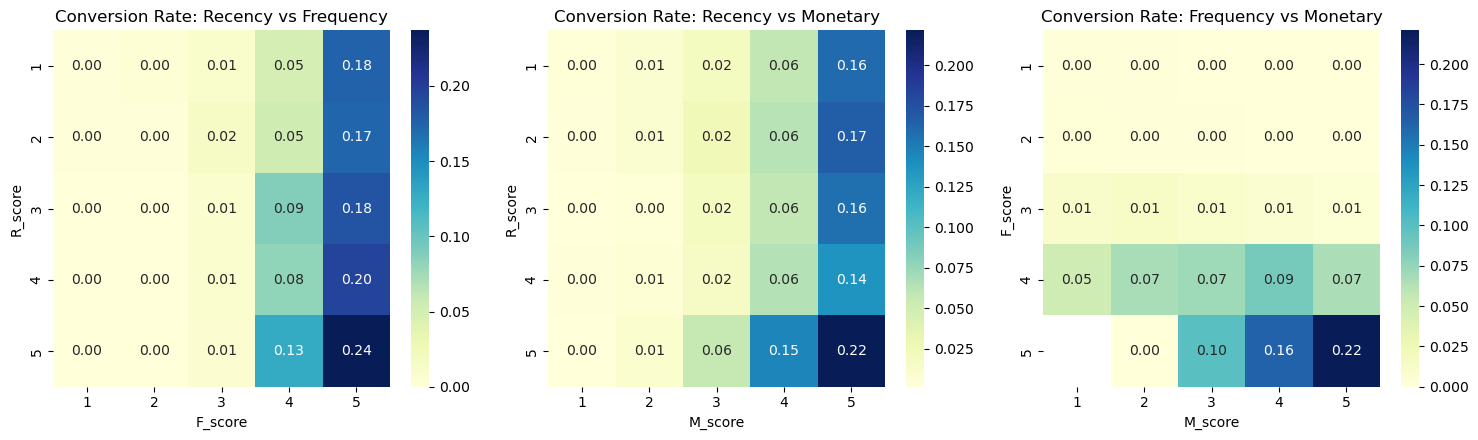

In [53]:
# Create pivot table between 2 factors in RFM
rf = sup.pivot_table(index="R_score", columns="F_score", values="Converted_To_Regular", aggfunc="mean")
rm = sup.pivot_table(index="R_score", columns="M_score", values="Converted_To_Regular", aggfunc="mean")
fm = sup.pivot_table(index="F_score", columns="M_score", values="Converted_To_Regular", aggfunc="mean")


fig, axs = plt.subplots(1, 3, figsize=(15, 4.5))

# Heatmap 1: R vs F
sns.heatmap(rf, annot=True, fmt=".2f", cmap="YlGnBu", ax=axs[0])
axs[0].set_title("Conversion Rate: Recency vs Frequency")
axs[0].set_xlabel("F_score")
axs[0].set_ylabel("R_score")

# Heatmap 2: R vs M
sns.heatmap(rm, annot=True, fmt=".2f", cmap="YlGnBu", ax=axs[1])
axs[1].set_title("Conversion Rate: Recency vs Monetary")
axs[1].set_xlabel("M_score")
axs[1].set_ylabel("R_score")

# Heatmap 3: F vs M
sns.heatmap(fm, annot=True, fmt=".2f", cmap="YlGnBu", ax=axs[2])
axs[2].set_title("Conversion Rate: Frequency vs Monetary")
axs[2].set_xlabel("M_score")
axs[2].set_ylabel("F_score")

# Layout setup
plt.tight_layout()
plt.show()

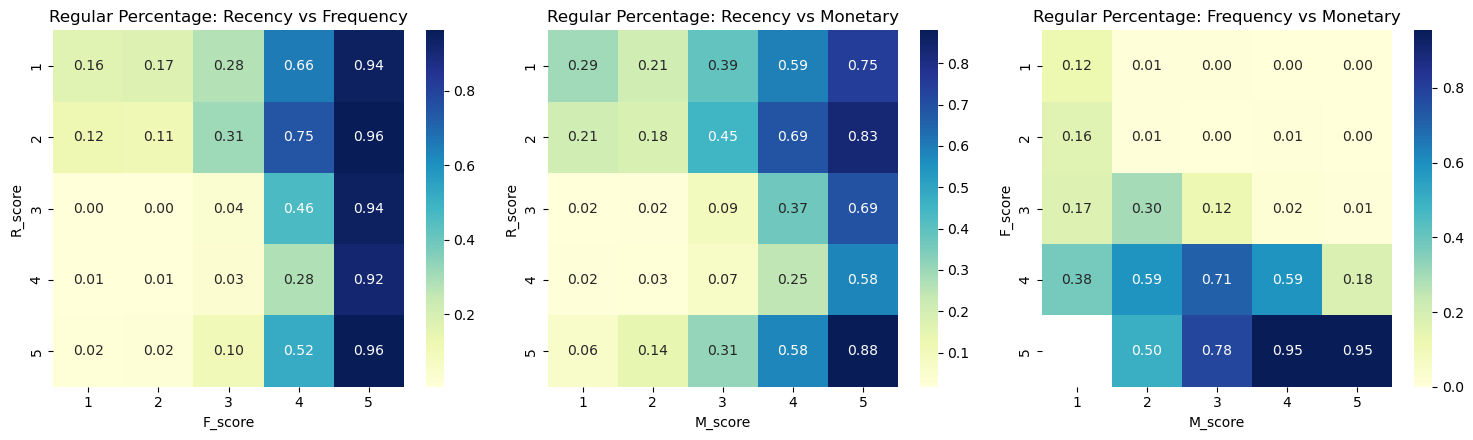

In [54]:
# Create pivot table between 2 factors in RFM
rf = sup.pivot_table(index="R_score", columns="F_score", values="Regular_Giver", aggfunc="mean")
rm = sup.pivot_table(index="R_score", columns="M_score", values="Regular_Giver", aggfunc="mean")
fm = sup.pivot_table(index="F_score", columns="M_score", values="Regular_Giver", aggfunc="mean")


fig, axs = plt.subplots(1, 3, figsize=(15, 4.5))

# Heatmap 1: R vs F
sns.heatmap(rf, annot=True, fmt=".2f", cmap="YlGnBu", ax=axs[0])
axs[0].set_title("Regular Percentage: Recency vs Frequency")
axs[0].set_xlabel("F_score")
axs[0].set_ylabel("R_score")

# Heatmap 2: R vs M
sns.heatmap(rm, annot=True, fmt=".2f", cmap="YlGnBu", ax=axs[1])
axs[1].set_title("Regular Percentage: Recency vs Monetary")
axs[1].set_xlabel("M_score")
axs[1].set_ylabel("R_score")

# Heatmap 3: F vs M
sns.heatmap(fm, annot=True, fmt=".2f", cmap="YlGnBu", ax=axs[2])
axs[2].set_title("Regular Percentage: Frequency vs Monetary")
axs[2].set_xlabel("M_score")
axs[2].set_ylabel("F_score")

# Layout setup
plt.tight_layout()
plt.savefig('figure 10')
plt.show()

In [55]:
# Conversion rate and proportion of regular givers by RFM score
rfm_rates = sup.groupby("RFM_Score").agg(
    Conversion_Rate=("Converted_To_Regular", "mean"),
    Regular_Rate=("Regular_Giver", "mean")
).reset_index()

rfm_rates

,RFM_Score,Conversion_Rate,Regular_Rate
0,3,0.001404,0.268097
1,4,0.002694,0.207004
2,5,0.002071,0.088217
3,6,0.003246,0.089384
4,7,0.005881,0.108202
5,8,0.010441,0.169136
6,9,0.025901,0.322552
7,10,0.042544,0.385206
8,11,0.090381,0.496474
9,12,0.121130,0.581716


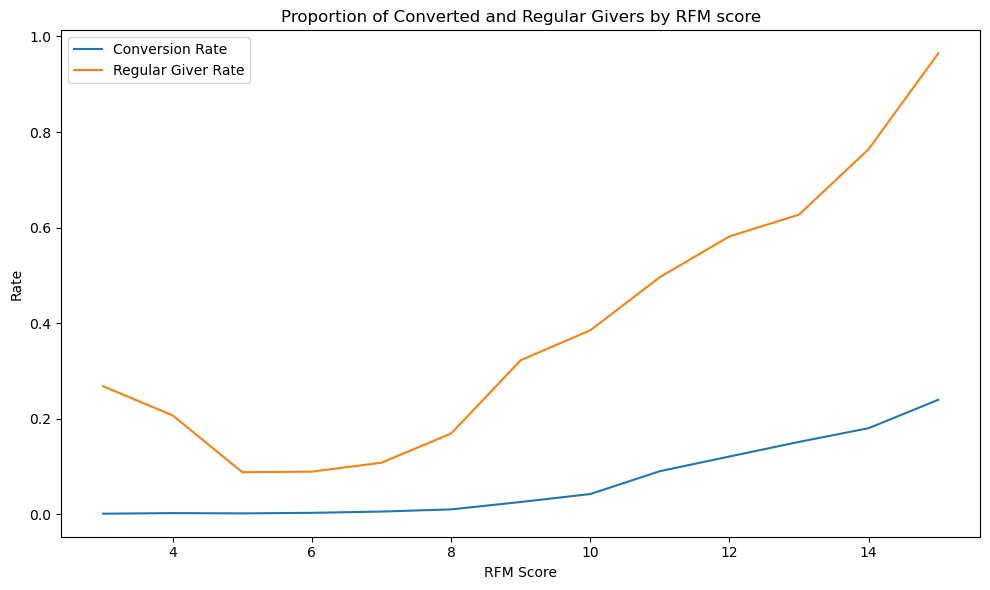

In [56]:
# PLot conversion rate and proportion of regular givers by RFM score
plt.figure(figsize=(10, 6))
sns.lineplot(data=rfm_rates, x="RFM_Score", y="Conversion_Rate", label="Conversion Rate")
sns.lineplot(data=rfm_rates, x="RFM_Score", y="Regular_Rate", label="Regular Giver Rate")
plt.title("Proportion of Converted and Regular Givers by RFM score")
plt.xlabel("RFM Score")
plt.ylabel("Rate")

# Layout setup
plt.legend()
plt.tight_layout()
plt.savefig('figure 11')
plt.show()

## Chi-square test of Independence: Mosaic_Group and Regular_Giver

In [57]:
# Create contingency table
contingency_table = pd.crosstab(sup["Mosaic_Group"], sup["Regular_Giver"])

# Perform Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

In [69]:
# Display results
# Contingency Table (Observed Counts)
contingency_table

Regular_Giver,0,1
Mosaic_Group,,
A,14660,7023
B,7939,5123
C,17806,9464
D,13147,5630
E,5684,2758
F,13505,7912
G,16940,10684
H,3218,2874
I,16468,8510


In [70]:
# Expected Counts if Independent
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
expected_df

Regular_Giver,0,1
Mosaic_Group,,
A,13930.899890,7752.100110
B,8392.077405,4669.922595
C,17520.437209,9749.562791
D,12063.852199,6713.147801
E,5423.818515,3018.181485
F,13760.000136,7656.999864
G,17747.875228,9876.124772
H,3913.989860,2178.010140
I,16047.872409,8930.127591


In [60]:
print("\nChi-square Test Summary:")
print(f"Chi-square Statistic: {chi2_stat:.2f}")
print(f"P-value: {p_val:.2e}")
print(f"Test Result: {'Significant' if p_val < 0.05 else 'Not Significant'}")


Chi-square Test Summary:
Chi-square Statistic: 1306.55
P-value: 2.06e-271
Test Result: Significant


## Giver types and conversion rate by states

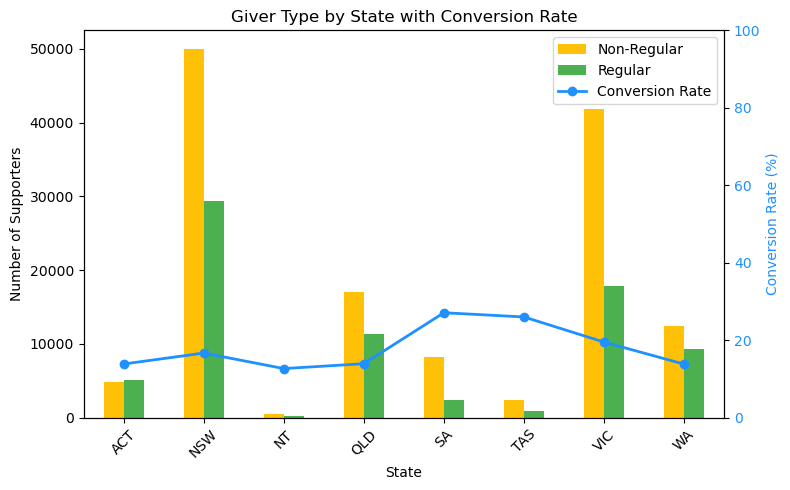

In [61]:
# Group giver types by state
state_counts = sup.groupby(["Mailing_State", "Regular_Giver"]).size().unstack(fill_value=0)
state_counts.columns = ["Non-Regular", "Regular"]
state_counts["Total"] = state_counts.sum(axis=1)

# Calculate conversion rate per state (within regular givers)
converted_by_state = sup[sup["Converted_To_Regular"] == 1].groupby("Mailing_State").size()
state_counts["Converted"] = converted_by_state
state_counts["Conversion Rate"] = (state_counts["Converted"] / state_counts["Regular"]) * 100


fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot: Regular vs Non-Regular
state_counts[["Non-Regular", "Regular"]].plot(kind="bar", stacked=False, ax=ax1, color=["#FFC107", "#4CAF50"])
ax1.set_ylabel("Number of Supporters")
ax1.set_xlabel("State")
ax1.set_title("Giver Type by State with Conversion Rate")
ax1.tick_params(axis='x', rotation=45)

# Line plot for conversion rate
ax2 = ax1.twinx()
ax2.plot(state_counts.index, state_counts["Conversion Rate"], color="dodgerblue", marker='o', linewidth=2, label="Conversion Rate")
ax2.set_ylabel("Conversion Rate (%)", color="dodgerblue")
ax2.tick_params(axis='y', labelcolor="dodgerblue")
ax2.set_ylim(0, 100)

# legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc="upper right")

# Layout setup
plt.tight_layout()
# plt.savefig('figure 12')
plt.show()

## Giver type and MOSAIC group

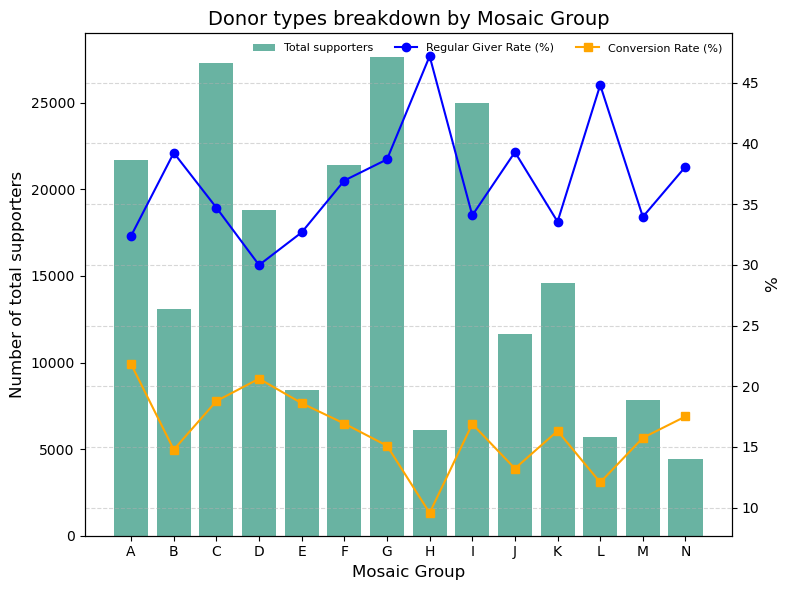

In [62]:
# Group by Mosaic Type
mosaic_group = sup.groupby("Mosaic_Group")

# Calculate metrics
# Proportion of regular 
regular_counts = mosaic_group["Regular_Giver"].sum()
total_counts = mosaic_group["Regular_Giver"].count()
regular_rate = (regular_counts / total_counts * 100).round(2)

converted_counts = mosaic_group["Converted_To_Regular"].sum()
converted_rate = (converted_counts / regular_counts * 100).round(2)

# Combine into a DataFrame
mosaic_summary = pd.DataFrame({
    "Total_Supporters": total_counts,
    "Regular_Givers": regular_counts,
    "Regular_Giver_Rate (%)": regular_rate,
    "Converted_to_Regular": converted_counts,
    "Conversion_Rate (%)": converted_rate
}).sort_index()


fig, ax1 = plt.subplots(figsize=(8, 6))

# Number of regular givers plot
bar = ax1.bar(mosaic_summary.index, mosaic_summary["Total_Supporters"], color="#69b3a2", label="Total supporters")
ax1.set_ylabel("Number of total supporters", fontsize=12)
ax1.set_xlabel("Mosaic Group", fontsize=12)
ax1.set_title("Donor types breakdown by Mosaic Group", fontsize=14)

# Percentage of regular givers plot
ax2 = ax1.twinx()
ax2.plot(mosaic_summary.index, mosaic_summary["Regular_Giver_Rate (%)"], color="blue", marker="o", label="Regular Giver Rate (%)")
ax2.plot(mosaic_summary.index, mosaic_summary["Conversion_Rate (%)"], color="orange", marker="s", label="Conversion Rate (%)")
ax2.set_ylabel("%", fontsize=12)

# Layout setup
lines_labels_1 = ax1.get_legend_handles_labels()
lines_labels_2 = ax2.get_legend_handles_labels()
lines = lines_labels_1[0] + lines_labels_2[0]
labels = lines_labels_1[1] + lines_labels_2[1]

# Create combined legend and position it above the plot
ax1.legend(lines, labels, loc="best", ncol=3, frameon=False, fontsize=8)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.savefig('figure 13')
plt.show()

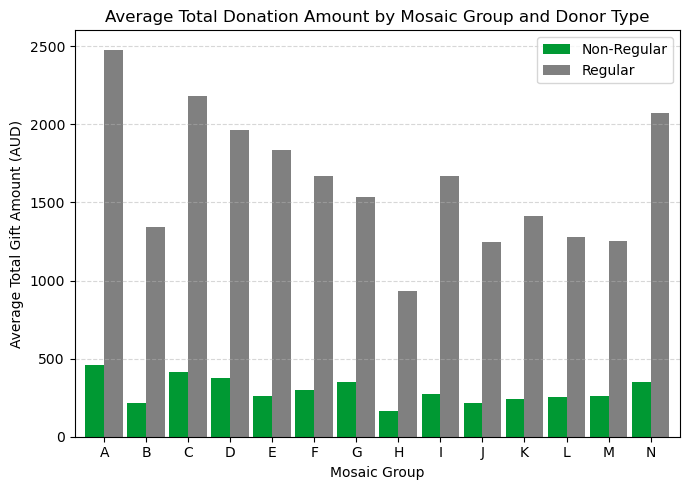

In [63]:
d=sup.copy()
d["Giver_Type"] = d["Regular_Giver"].map({0: "Non-Regular", 1: "Regular"})

# Group by Mosaic and Giver category and calculate mean total donation
donation_summary = d.groupby(["Mosaic_Group", "Giver_Type"])["Total_Gift_Amount"].mean().reset_index()

mosaic_order = sorted(donation_summary["Mosaic_Group"].dropna().unique())
donation_summary["Mosaic_Group"] = pd.Categorical(donation_summary["Mosaic_Group"], categories=mosaic_order, ordered=True)
donation_summary = donation_summary.sort_values("Mosaic_Group")

# Pivot table between Mosaic group and giver type
pivot_amounts = donation_summary.pivot(index="Mosaic_Group", columns="Giver_Type", values="Total_Gift_Amount")

# Average Total Donation Amount plot
pivot_amounts.plot(kind="bar", figsize=(7, 5), 
#                    colormap='YlGnBu',
                   color=["#009933", 'grey'],
                   width=0.9,
                  )
plt.title("Average Total Donation Amount by Mosaic Group and Donor Type")
plt.ylabel("Average Total Gift Amount (AUD)")
plt.xlabel("Mosaic Group")

# Layout setup
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y', 
         linestyle='--', 
         alpha=0.5)
plt.tight_layout()
# plt.savefig('figure 14')
plt.show()


## Initial and current product distribution of regular givers

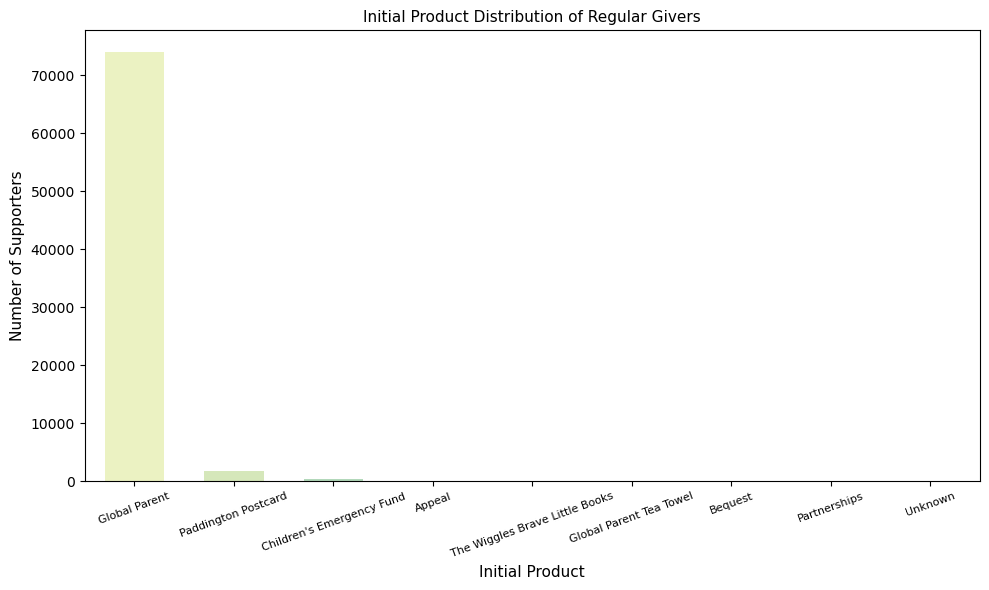

In [64]:
# Filter to include only regular givers 
regular_df = sup[sup["Regular_Giver"] == 1]
regular_df = regular_df[
    (regular_df["Product_Initial"] != "Not Regular") &
    (regular_df["Product_Current"] != "Not Regular")
]

# Initial product plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=regular_df,
    x="Product_Initial",
    palette="YlGnBu",
    order=regular_df["Product_Initial"].value_counts().index,
    width=0.6            # narrower bars
)

# Layout setup
ax.set_title("Initial Product Distribution of Regular Givers", fontsize=11)
ax.set_xlabel("Initial Product", fontsize=11)
ax.set_ylabel("Number of Supporters", fontsize=11)
ax.tick_params(axis="x", 
               rotation=20,
               labelsize=8
              )
plt.tight_layout()
# plt.savefig('figure 15')
plt.show()

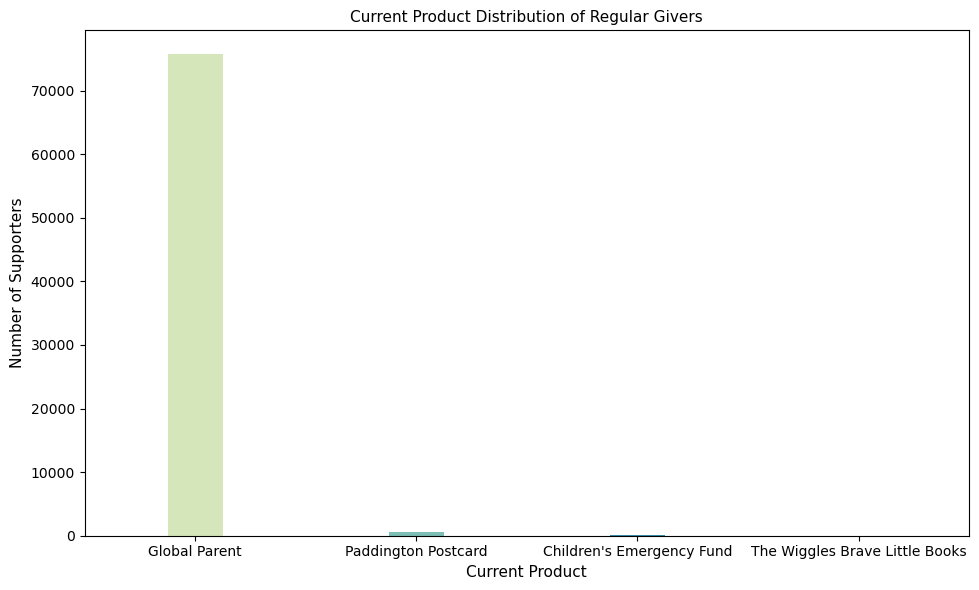

In [65]:
# Current product plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=regular_df,
    x="Product_Current",
    palette="YlGnBu",
    order=regular_df["Product_Current"].value_counts().index,
    width=0.25          
)

# Layout set up
ax.set_title("Current Product Distribution of Regular Givers", fontsize=11)
ax.set_xlabel("Current Product", fontsize=11)
ax.set_ylabel("Number of Supporters", fontsize=11)
ax.tick_params(axis="x", 
#                rotation=45
              )
plt.tight_layout()
# plt.savefig('figure 16')
plt.show()